# 泰坦尼克号生存者预测

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
# 加载数据集
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
# 将数据集合并
df = data_train.append(data_test)

In [3]:
# 检查数据格式
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 数据解释
* __Passengerld__:乘客ID
* __Survived__:乘客是否生还
* __Pclass__:乘客登机(1/2/3等舱位)
* __Name__:乘客姓名
* __Sex__:乘客性别
* __Age__:年龄
* __SlbSp__:堂兄弟/妹个数
* __Parch__:父母与小孩的个数
* __Ticket__:票价
* __Cabin__:客舱
* __Embarked__:登船港口

In [4]:
# 查看数据常用的统计量信息
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 异常值初始观察(主要观察一下最大与最小值)
* __Fare__:船票的平均价格32.2,中位数14,平均值比中位数大很多,说明该特征分部是严重的右偏
* __Age__:最小值为0.17,最大值为80,0.17应该是不到一岁的婴儿,80则为老人家,这些极端数据需要进一步排查
* __Slbsp__:与Parch:Silbsp最大值为8,可能是异常,但又看Parch最大值为9.这两个特征同时出现,需要进一步排查

In [5]:
# 输出df数据集的观测值
'''
1.该数据集是一个DataFrame实例
2.数据的行索引是0到1308的一组数字
3.数据集中总共有1309行观测值
4.数据集中总共有12列变量,其中Age,Cabin,Embarked,Fare,Survived,Ticket有数据缺失
5.dtypess:给出了变量数据类型的汇总情况,可以用dtype方法获取每个变量的数据类型
6.memory usage:保存数据所耗费的类型
'''
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [6]:
# 查看数据集的行列大小
f'合并后一共有{str(df.shape[0])}条数据'

'合并后一共有1309条数据'

In [7]:
# 统计各行缺失的数据量
pd.isnull(df).sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

### 数据可视化

In [8]:
# 找出特征类型少的特征,进行可视化分析
%matplotlib inline
plt.rc('font', family='SimHei', size=13)
cat_list = ['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
for n, i in enumerate(cat_list):
    Cabin_cat_num = df[i].value_counts().index.shape[0]
    print('{0}.{1}特征的类型数量是:{2}'.format(n+1, i, Cabin_cat_num))

1.Pclass特征的类型数量是:3
2.Name特征的类型数量是:1307
3.Sex特征的类型数量是:2
4.Age特征的类型数量是:98
5.SibSp特征的类型数量是:7
6.Parch特征的类型数量是:8
7.Ticket特征的类型数量是:929
8.Fare特征的类型数量是:281
9.Cabin特征的类型数量是:186
10.Embarked特征的类型数量是:3


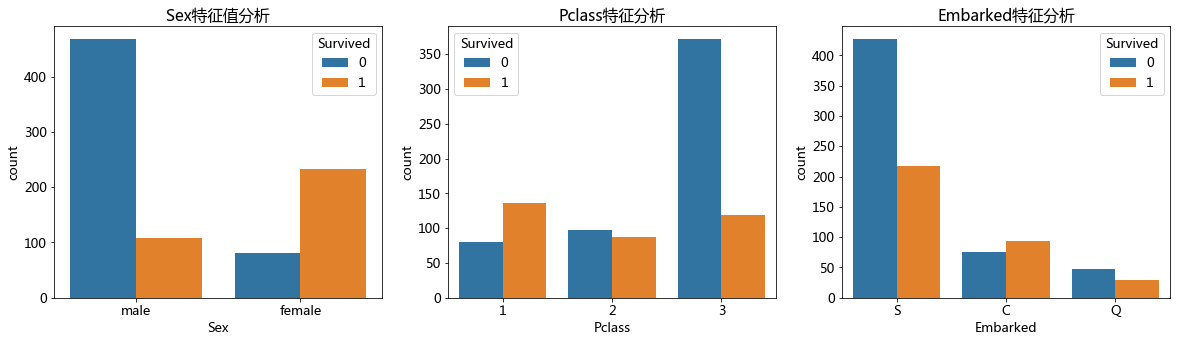

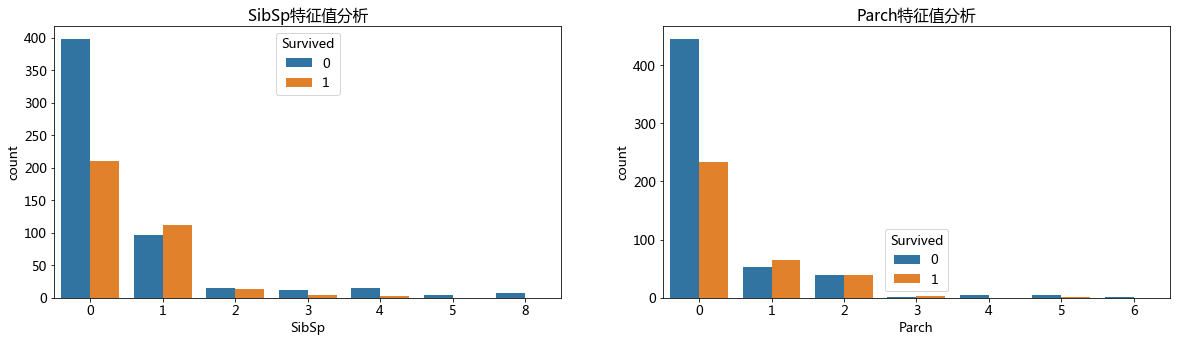

In [9]:
# 对Pclass,Sex,SibSp,Parch,Embarked五个特征进行可视化分析

# 设置中文显示字体
plt.rcParams['font.family']=['Microsoft YaHei']

f , [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(20,5))
sns.countplot(x='Sex', hue='Survived', data=data_train, ax=ax1)
sns.countplot(x='Pclass', hue='Survived', data=data_train, ax=ax2)
sns.countplot(x='Embarked', hue='Survived', data=data_train, ax=ax3)
ax1.set_title('Sex特征值分析')
ax2.set_title('Pclass特征分析')
ax3.set_title('Embarked特征分析')

f, [ax1, ax2] = plt.subplots(1,2, figsize=(20,5))
sns.countplot(x='SibSp', hue='Survived', data=data_train, ax=ax1)
sns.countplot(x='Parch', hue='Survived', data=data_train, ax=ax2)
ax1.set_title('SibSp特征值分析')
ax2.set_title('Parch特征值分析')

plt.show()

#### 对上面结果进行分析
* __Sex__:男性获救比例低于女性.所以应该救援的时候女士优先
* __Pclass__:三等舱人数最多,但是获救比例最小,一等舱获救比例最高.票价反应社会地位,头等舱获救比例高
* __Embarked__:港口S上船的人最多,对应人数最多的三等舱票
* __SibSp__:大部分人是没有兄弟姐妹一起的,这种一个人的情况获救比例较低,而随着兄弟人数增加获救比例提高
* __Parch__:与SibSp同理

以上是对单独一个特征进行分析,下面分析在某些特定的特征下经过其他特征影响发的生存率,使用__FaceGrid__进行具体分析

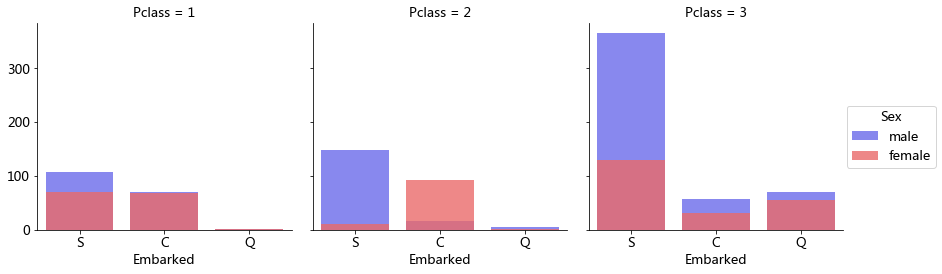

In [10]:
# 不同Pclass中男性和女性在不同港口下的数量对比
grid = sns.FacetGrid(df, col='Pclass', hue='Sex', palette='seismic', size=4)
grid.map(sns.countplot, 'Embarked', alpha=0.8)
grid.add_legend()
plt.show()

#### 结果分析
* 一等舱和二等舱的人基本上都是从S和C港上船的,而Q港的头等舱人数基本上为0,推测S和C港可能是高级港口,Q港是普通港口
* 从总体的的人数看来,在S港上船的人最多,所有S港应该是大型港口
* C港口上船的人主要性别为女性,所以C港的生还率应该很高

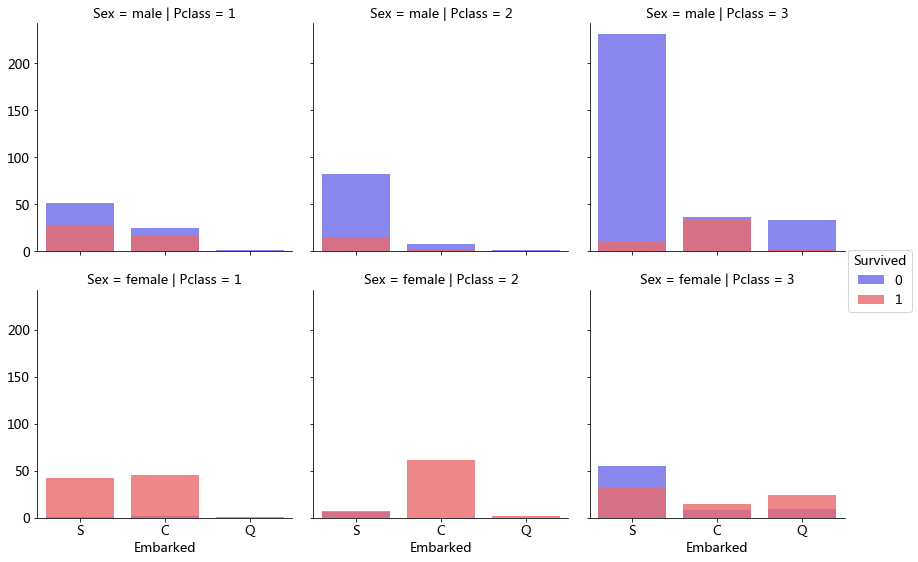

In [11]:
# 不同Pclass中,男性和女性不同港口登陆和存活对比
grid = sns.FacetGrid(data_train, col='Pclass', row='Sex', hue='Survived', palette='seismic', size=4)
grid.map(sns.countplot, 'Embarked', alpha=0.8)
grid.add_legend()
plt.show()

#### 结果分析
* 从三个港口看来,女性的存活率明显大于男性,其中一等和二等舱中的女性基本都得到了救援
* 从相同性别看来,获救率的排序是一等舱>二等舱>三等舱

### 定距/定比特征分析

__1. Age分布Survived特征分析__

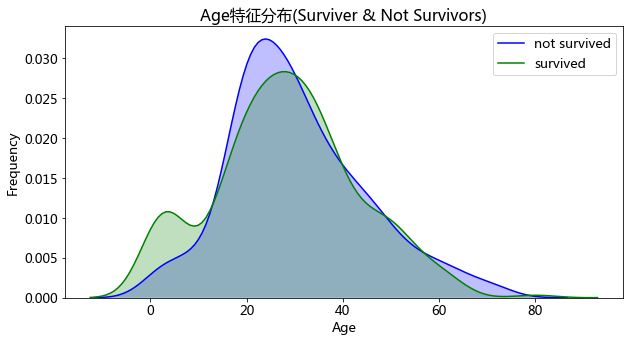

In [17]:
# kde分部
f, ax = plt.subplots(figsize=(10,5))
sns.kdeplot(data_train.loc[(data_train['Survived']==0), 'Age'], color='b', shade=True, label='not survived')
sns.kdeplot(data_train.loc[(data_train['Survived']==1), 'Age'], color='g', shade=True, label='survived')
plt.title('Age特征分布(Surviver & Not Survivors)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
# 忽略警告信息
warnings.filterwarnings('ignore')

__结论__:0-15岁的孩子获救率较高

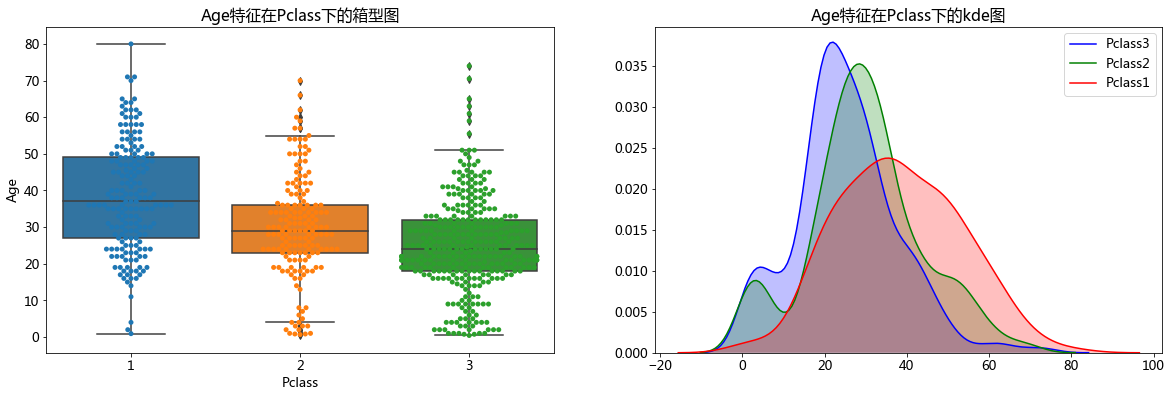

In [21]:
# 箱型图特征分析
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(20,6))
sns.boxplot(x="Pclass", y="Age", data=data_train, ax=ax1)
sns.swarmplot(x='Pclass', y='Age', data=data_train, ax=ax1)
sns.kdeplot(data_train.loc[(data_train['Pclass']==3), 'Age'], color='b', shade=True, label='Pclass3', ax=ax2)
sns.kdeplot(data_train.loc[(data_train['Pclass']==2), 'Age'], color='g', shade=True, label='Pclass2', ax=ax2)
sns.kdeplot(data_train.loc[(data_train['Pclass']==1), 'Age'], color='r', shade=True, label='Pclass1', ax=ax2)
ax1.set_title('Age特征在Pclass下的箱型图')
ax2.set_title('Age特征在Pclass下的kde图')
fig.show()

__结论:__
不同Pclass下__年龄分布中位数按Pclass1>Pclass2>Pclass3__分布

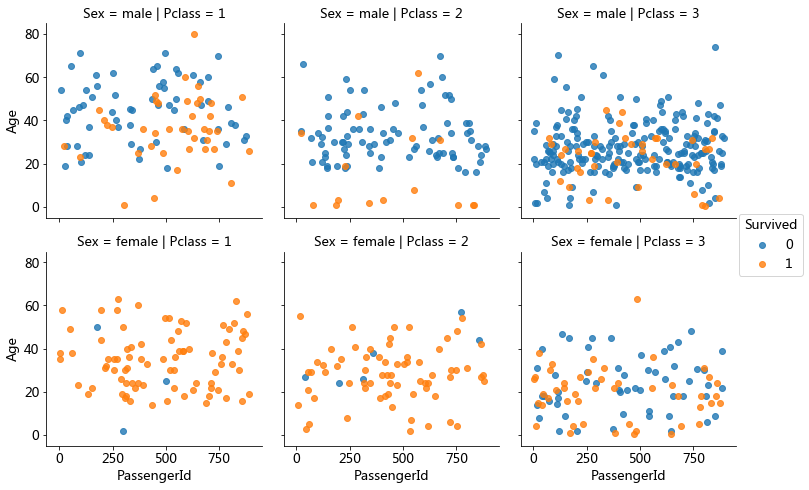

In [24]:
# Sex, Pclass分类条件下的Age年龄对Survived的散点图
grid = sns.FacetGrid(data_train, row='Sex', col='Pclass', hue='Survived', size=3.5)
grid.map(plt.scatter, 'PassengerId', 'Age', alpha=0.8)
grid.add_legend()
plt.show()

__结论__:
* Pclass1,2中存活的基本是女性(先就女性)
* Pclass2中小于15岁的人基本上都存活(先救孩童)

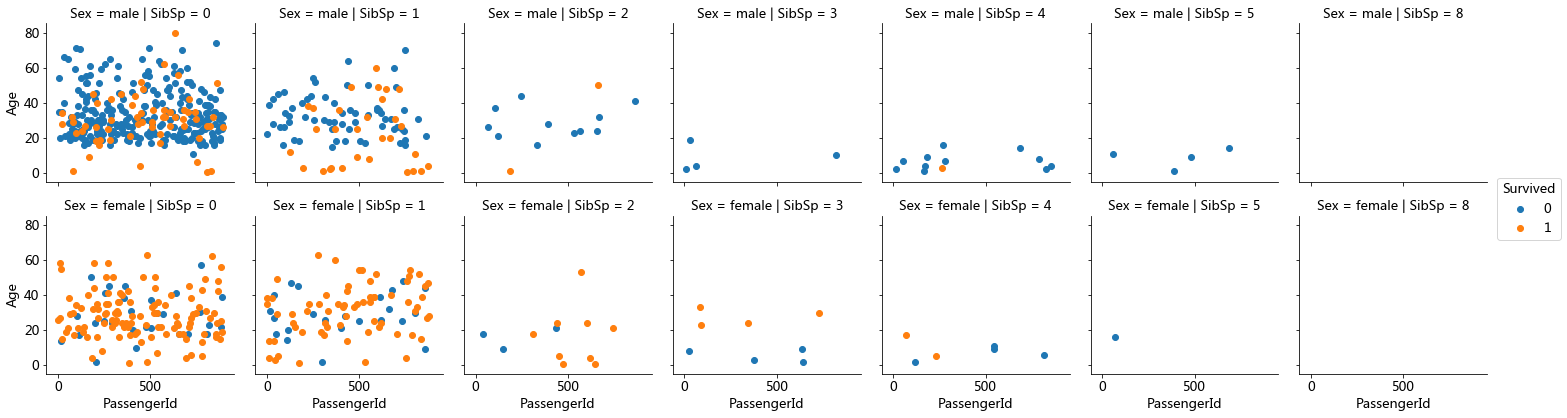

In [28]:
# Sex,SibSp分类条件下的Age年龄对Sruvived的散点图
grid = sns.FacetGrid(data_train, col="SibSp", row='Sex', hue='Survived')
grid = grid.map(plt.scatter, "PassengerId", "Age")
grid.add_legend()
plt.show()

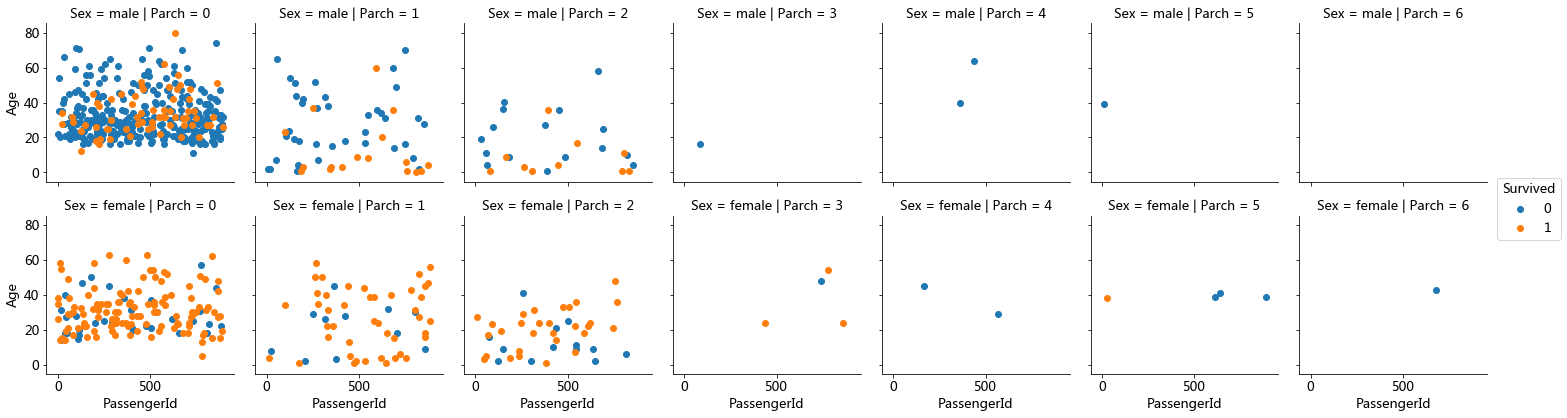

In [30]:
# Sex,Parch分类条件下Age对Survived的散点图
grid = sns.FacetGrid(data_train, col="Parch", row="Sex", hue="Survived")
grid = grid.map(plt.scatter, "PassengerId", "Age")
grid.add_legend()
plt.show()

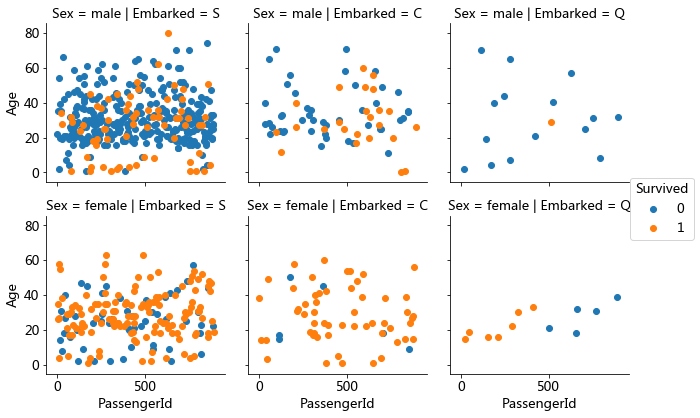

In [34]:
# Sex,Embarked分类条件下Age对Survived的散点图
grid = sns.FacetGrid(data_train, col='Embarked', row='Sex', hue='Survived')
grid = grid.map(plt.scatter, "PassengerId", 'Age')
grid.add_legend()
plt.show()

__2. Fare分布和特征分析__

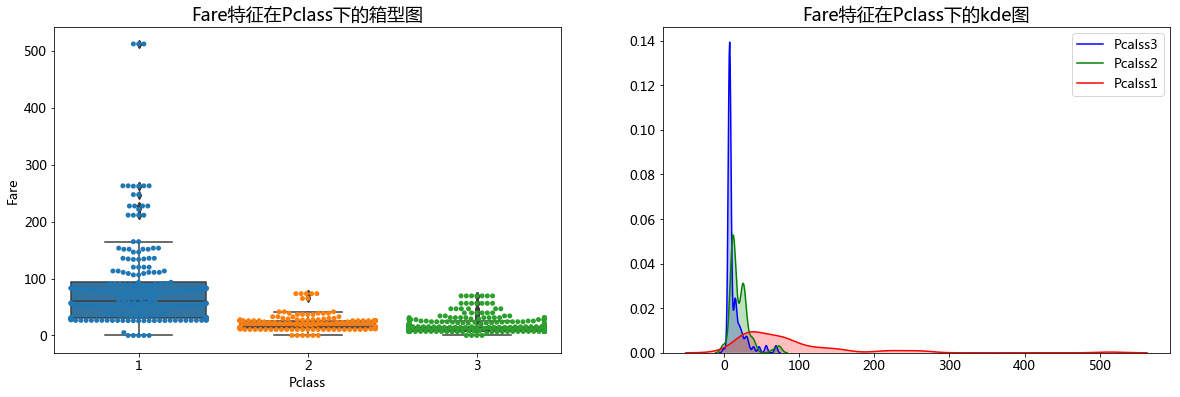

In [41]:
# 箱型图特征分析
f, [ax1, ax2] = plt.subplots(1, 2, figsize=(20,6))
sns.boxplot(x='Pclass', y='Fare', data=data_train, ax=ax1)
sns.swarmplot(x='Pclass', y='Fare', data=data_train, ax=ax1)
sns.kdeplot(data_train.loc[(data_train['Pclass']==3), 'Fare'], color='b', shade=True, label='Pcalss3', ax=ax2)
sns.kdeplot(data_train.loc[(data_train['Pclass']==2), 'Fare'], color='g', shade=True, label='Pcalss2', ax=ax2)
sns.kdeplot(data_train.loc[(data_train['Pclass']==1), 'Fare'], color='r', shade=True, label='Pcalss1', ax=ax2)
ax1.set_title('Fare特征在Pclass下的箱型图', fontsize=18)
ax2.set_title('Fare特征在Pclass下的kde图', fontsize=18)
plt.show()